# Building a Hierarchy

In [1]:
# import packages
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a random cluster dataset
X, y = make_blobs(n_samples=1000, centers=8, n_features=8, random_state=80)

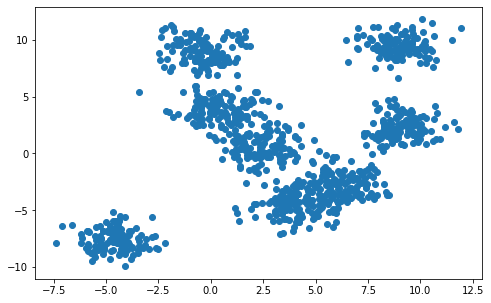

In [3]:
# visualize the data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# create a distance matrix
distances = linkage(X, method='centroid', metric='euclidean')
print(distances)

[[1.00000000e+01 8.15000000e+02 5.39886481e-01 2.00000000e+00]
 [3.28000000e+02 4.50000000e+02 7.27933709e-01 2.00000000e+00]
 [6.99000000e+02 7.83000000e+02 7.42084527e-01 2.00000000e+00]
 ...
 [1.98500000e+03 1.99500000e+03 1.90669837e+01 5.00000000e+02]
 [1.99000000e+03 1.99400000e+03 2.03021431e+01 5.00000000e+02]
 [1.99600000e+03 1.99700000e+03 2.06278186e+01 1.00000000e+03]]


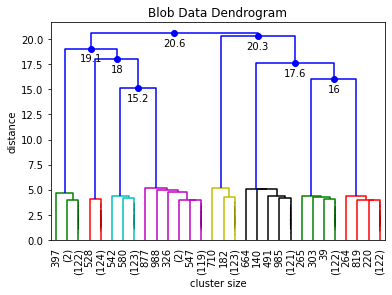

In [5]:
# ploting a dendrogram
def annotated_dendrogram(*args, **kwargs):
        scipy_dendro = dendrogram(*args,
                                  truncate_mode='lastp',
                                  show_contracted=True,
                                 leaf_rotation=90.)
        
        #plt.figure(figsize=(10,7))
        plt.title('Blob Data Dendrogram')
        plt.xlabel('cluster size')
        plt.ylabel('distance')
        
        for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > 10:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y,
                             (x, y),
                             xytext=(0, -5),
                             textcoords='offset points',
                             va='top',
                             ha='center')
                
        return scipy_dendro
dn = annotated_dendrogram(distances)
plt.show()

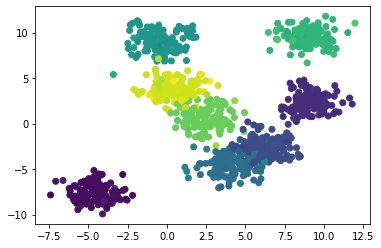

In [6]:
# plot the clusters
scipy_clusters = fcluster(distances, 3, criterion='distance')
plt.scatter(X[:, 0], X[:, 1], c=scipy_clusters)
plt.show()

# Applying Linkage Criteria

In [7]:
# Create a list with all the possible linkage method hyperparameters
methods = ['centroid', 'single', 'complete', 'average', 'weighted']

Loop through each of the methods in the list that you just created and display the effect that they have on the same dataset

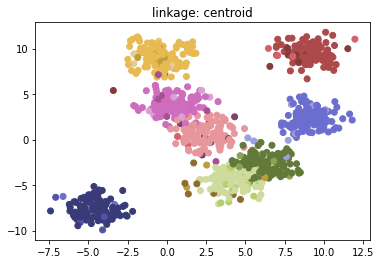

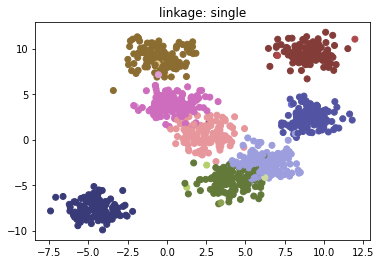

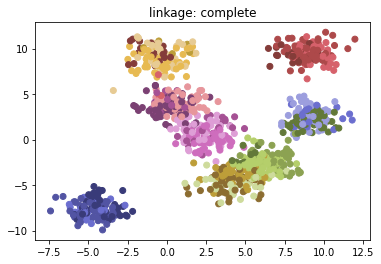

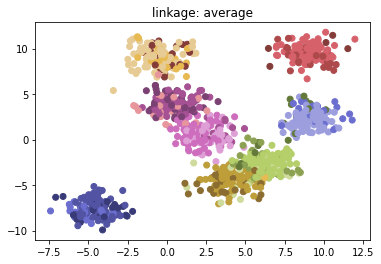

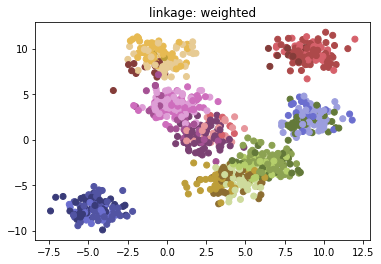

In [8]:
for method in methods:
    distances = linkage(X, method=method, metric='euclidean')
    clusters = fcluster(distances, 3, criterion='distance')
    plt.title('linkage: ' + method)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab20b')
    plt.show()

# Implementing Agglomerative Clustering with sklearn

In [9]:
# import package
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")

In [10]:
# assign the model to the ac variable
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion='distance')

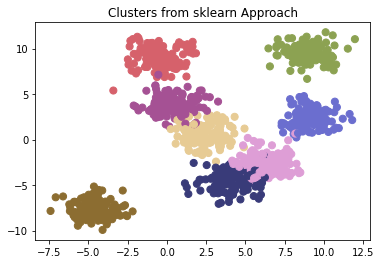

In [11]:
# seeing the final sklearn cluster
plt.figure(figsize=(6, 4))
plt.title("Clusters from sklearn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters, s=50, cmap='tab20b')
plt.show()

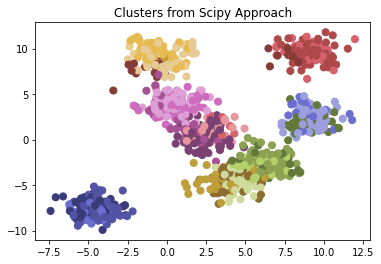

In [12]:
# seeing the final scipy cluster
plt.figure(figsize=(6, 4))
plt.title("Clusters from Scipy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters, s=50, cmap='tab20b')
plt.show()